In [550]:
# libraries importieren
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
sns.set_theme()

In [551]:
pd.options.display.max_colwidth = None
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

In [552]:
# uniques(df) ermittelt die einheitlichen Werte aller kategorischen (nicht numerischen) Spalten
def uniques(df, topn=50):
    import numpy as np 
    dfx = df.select_dtypes([object])
    return pd.DataFrame({'column': dfx.columns,
                         'values': [dfx[col].unique()[:topn] for col in dfx.columns]})

In [553]:
# Daten einlesen

In [554]:
housing = pd.read_csv('./data/melbourne_sample.csv')
housing.head()

,Year,Regionname,Rooms,Distance,Propertycount,SellerG,Price
0,2018,Northern Metropolitan,2,3.0,4019.0,Jellis,750000.0
1,2018,Western Metropolitan,4,7.5,1543.0,Nelson,1630000.0
2,2018,Western Metropolitan,3,10.4,3464.0,Barry,970000.0
3,2018,Western Metropolitan,4,10.4,3464.0,Barry,790000.0
4,2018,Western Metropolitan,3,10.4,3464.0,Nelson,1025000.0


Als erstes wollen wir verstehen, wie die Daten beschaffen sind

* Dazu verwenden wir verschieden Funktionen
* `DataFrame.info()` zeigt alle Spalten
* `DataFrame.sample(n)` zeigt eine Zufallsauswahl von n Zeilen
* Mit der Hilfsfunktion `uniques(df)` erhalten wir einen Eindruck der kategorischen Variablen


In [574]:
print('Housing Info:')
print(housing.info())

print('Show sample of 10:')
print(housing.sample(10))

print(uniques(housing))

Housing Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           2362 non-null   int64  
 1   Regionname     2362 non-null   object 
 2   Rooms          2362 non-null   int64  
 3   Distance       2362 non-null   float64
 4   Propertycount  2362 non-null   float64
 5   SellerG        2362 non-null   object 
 6   Price          1974 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 129.3+ KB
None
Show sample of 10:
      Year             Regionname  Rooms  Distance  Propertycount   SellerG  \
555   2018  Northern Metropolitan      3      19.6        10926.0       HAR   
580   2018   Western Metropolitan      4      15.5         3656.0       YPA   
214   2018  Northern Metropolitan      3      12.7         4168.0     Miles   
1015  2018   Western Metropolitan      2       8.2         3284.0      Brad   
3

Die Daten verstehen

* Weil es sehr viele Daten sind zeigen wir eine Zufallsauswahl von 10 Rows an
* Dazu verwenden wir die Funktion `DataFrame.sample(n)`, wobei n die Anzahl Rows ist

In [560]:
housing.sample(10)

,Year,Regionname,Rooms,Distance,Propertycount,SellerG,Price
2291,2018,Western Metropolitan,4,31.7,14092.0,Raine,791000.0
16,2018,Western Metropolitan,2,4.3,6567.0,Jellis,530000.0
1227,2018,Western Metropolitan,3,14.8,7719.0,GL,587500.0
1716,2018,Western Metropolitan,4,6.2,6232.0,Nelson,1683000.0
940,2018,Northern Metropolitan,3,5.3,11364.0,Biggin,NaN
905,2018,Northern Metropolitan,3,25.9,5812.0,Stockdale,606000.0
456,2018,Northern Metropolitan,2,11.2,8870.0,Eview,685000.0
1316,2018,Western Victoria,3,31.7,3600.0,YPA,415000.0
1151,2018,Northern Metropolitan,4,5.3,11364.0,Ray,1375000.0
821,2018,Northern Metropolitan,2,2.1,5825.0,Jellis,NaN


* `sns.histplot(data=dataframe, y='col')` zeigt ein Histogram für die Variable `col` an
* Erstelle einen histplot für verschiedene Variablen

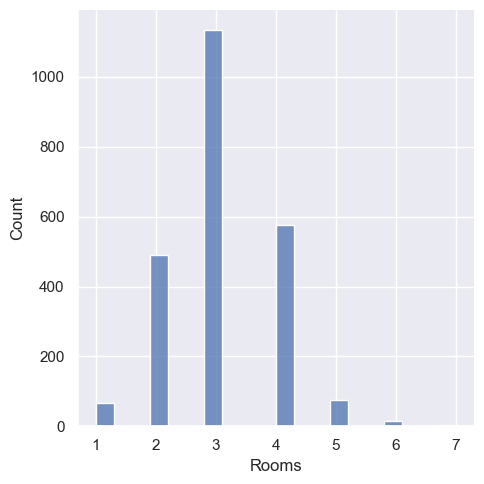

In [568]:
# Show Histogram for number of rooms
sns.displot(housing['Rooms'], kde=False, bins=20)
plt.title('Histogram of Rooms')
plt.show()

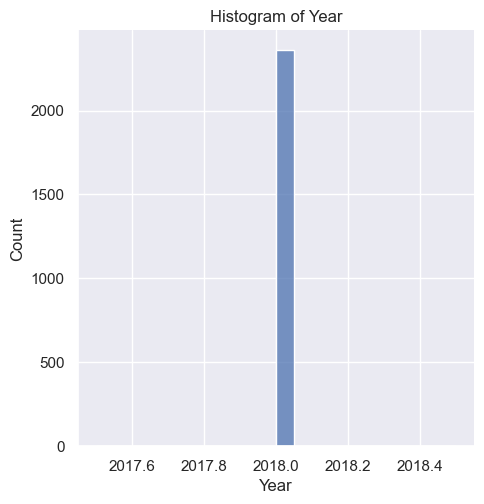

In [569]:
# Show Histogram for number of rooms
sns.displot(housing['Year'], kde=False, bins=20)
plt.title('Histogram of Year')
plt.show()

Als nächstes wollen wir mehrere Variablen vergleichen

* `sns.scatterplot()` erstellt einen Scatterplot zwischen zwei Variablen
* mit `hue='col'` werden die Punkte nach einer weiteren Variable eingefärbt, z.B. Propertycount, Distance
* mit `size='col'` wird die Punktgrösse nach einer weiteren Variablen verändert

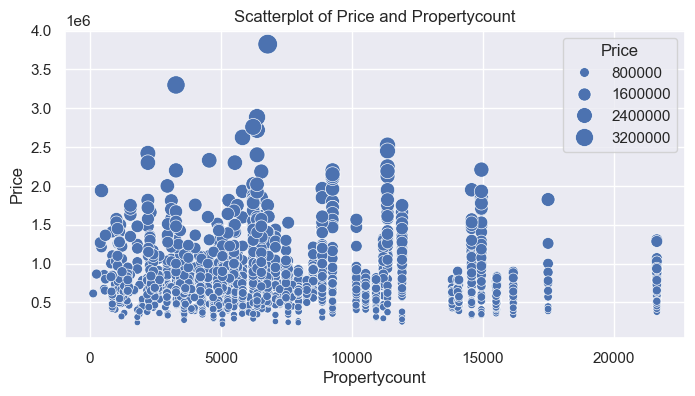

In [603]:
sns.scatterplot(data=housing, x='Propertycount', y='Price', size='Price', sizes=(20, 200))
plt.title('Scatterplot of Price and Propertycount')
plt.show()

Bei vielen Daten sieht man in einem Scatterplot nicht alle Punkte, weil sie an gleicher Position stehen und damit überlagert werden.

* `sns.stripplot()` erzeugt Scatterplots nach verschiedenen Kategorien und zeigt mehr Punkte pro Kategorie
* mit `hue='col'` werden die Punkte eingefärbt

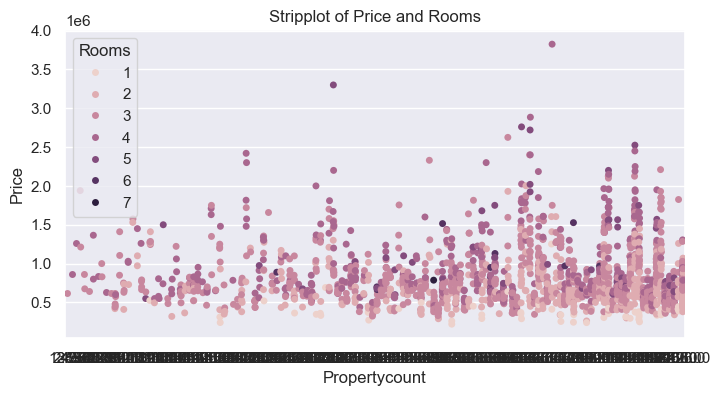

In [582]:
sns.stripplot(data=housing, x='Propertycount', y='Price', hue='Rooms', jitter=True)
plt.title('Stripplot of Price and Rooms')
plt.show()

Mit einem Pairplot werden verschiedene Variablen mit einander verglichen

* `sns.pairplot()` erstellt eine Matrix numerischer Variablen
* mit `hue='col'` wird die Farbe eingestellt
* mit `y_vars='Price'` wird die Anzeige auf eine Variable beschränkt


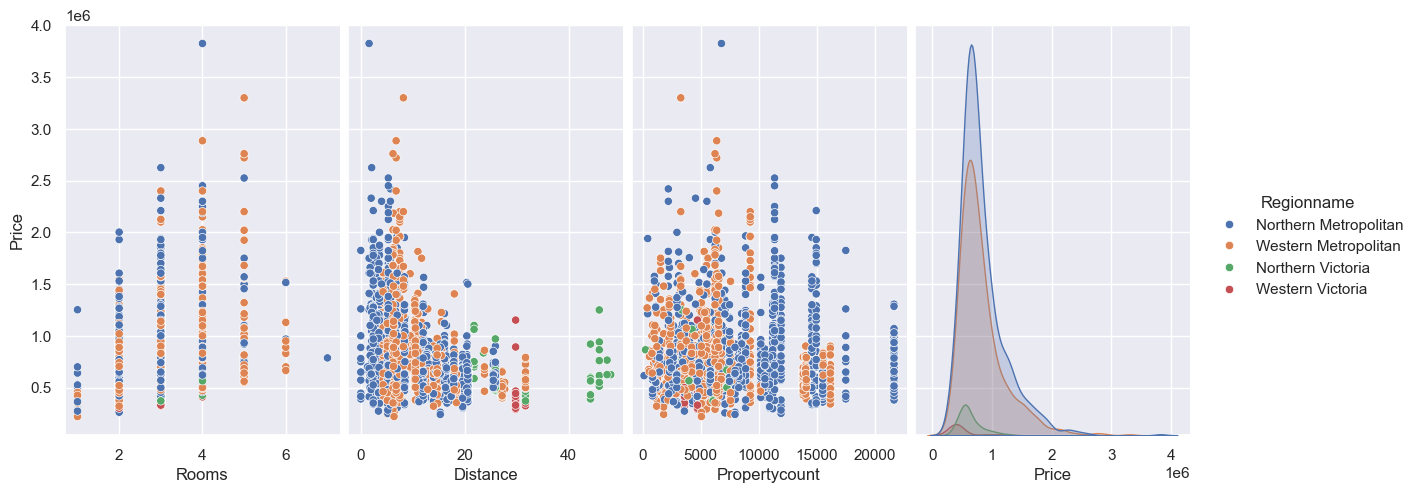

In [624]:
sns.pairplot(housing.drop('Year', axis=1), y_vars=['Price'], hue='Regionname', size=5, aspect=0.6125) # drop year
# sns.pairplot(housing, y_vars=['Price'], hue='Regionname', size=5, aspect=0.6125)
plt.show()

Heatmaps sind bei grossen Datenmengen oft aussagekräftiger als Scatterplots.

* `sns.heatmap()` erstellt eine Heatmap
* damit dies nützlich ist, benötigen wir die Korrelationsmatrix, d.h. die Berechnung der Korrelation zwischen den Variablen. Das folgende Script erstellt diese Matrix im DataFrame `corr`
* danach können wir diesen Dataframe an `sns.heatmap()` übergeben

In [585]:
corr = (housing
        .select_dtypes(include='number')
        .corr()
       )

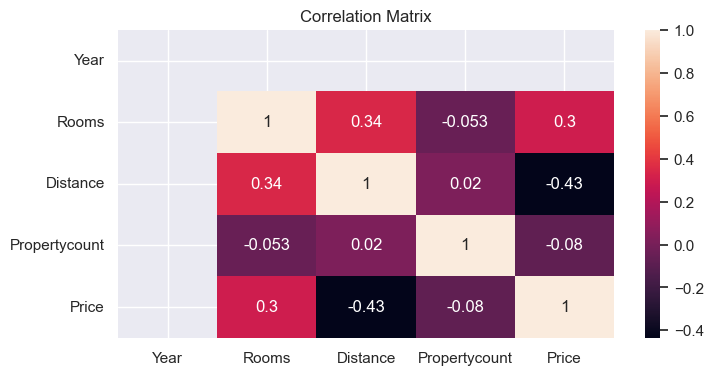

In [586]:
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

Mit einem Lineplot können wir Zusammehänge manchmal besser Sichtbar machen

* `sns.lineplot()` erstellt einen Lineplot der *gemittelten* Daten (d.h. jeder Datenpunkt ist der Durschnitt der Gruppe, die der Datenpunkt repräsentiert)
* `sns.lineplot()` zeigt für jeden Punkt das 95% Konfidenzinterval an also die Spanne in der der wahre Wert liegt (bzw. die Unsicherheit)
* mit `hue='col'` wird pro Wert eine Linie abgebildet

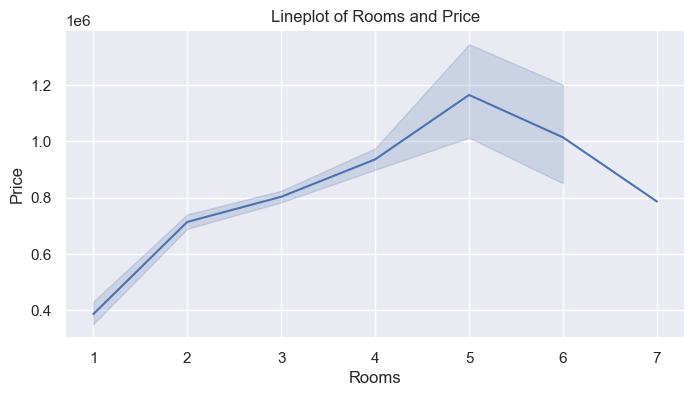

In [589]:
sns.lineplot(data=housing, x='Rooms', y='Price')
plt.title('Lineplot of Rooms and Price')
plt.show()